In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
df = pd.read_csv('/content/sample_data/Balanced_credit_card_transactions.csv')
print(df.shape)
df.is_fraud.value_counts()

(15506, 25)


,count
is_fraud,
0,8000
1,7506


In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,888530,888530,2019-12-23 17:25:54,4897067971111209737,"fraud_Hills, Hegmann and Schaefer",health_fitness,7.64,Randy,Wood,M,...,-82.6927,42619,Environmental education officer,1975-10-07,bd596bb4a990c8ecff2b8f17f0ce0ea7,1356283554,29.015377,-83.116008,0,NaN
1,823207,823207,2019-12-09 07:17:29,38052002992326,"fraud_Connelly, Reichert and Fritsch",gas_transport,54.74,Anna,Logan,F,...,-95.0202,34153,Building surveyor,1995-09-11,622be45a5219295e6b78a323e93a8f28,1355037449,30.701006,-95.426967,0,77340.0
2,159648,159648,2019-03-25 18:06:34,4170689372027579,fraud_Padberg-Sauer,home,43.11,Samuel,Frey,M,...,-97.4798,116001,Media buyer,1993-05-10,10b16fc698735407f275762ace19a37a,1332698794,36.224589,-96.941622,0,74032.0
3,572169,572169,2019-08-31 13:30:47,372509258176510,"fraud_Hoppe, Harris and Bednar",entertainment,35.29,Kristen,Hanson,F,...,-83.4845,6951,Learning disability nurse,1985-06-18,502a63422aa27e0fc9bec6a6498a054d,1346419847,42.787111,-83.759750,0,48451.0
4,109735,109735,2019-03-03 22:22:29,2222001896600109,fraud_Dickinson-Rempel,misc_pos,1.72,Susan,Hernandez,F,...,-89.9618,2401,"Buyer, industrial",1972-01-03,65408d8160d2061b35def1d0a38885ab,1330813349,39.224207,-89.617698,0,62056.0


In [ ]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'trans_date_trans_time', 'cc_num',
       'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street',
       'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'merch_zipcode'],
      dtype='object')

In [ ]:
# drop Unnamed: 0.1, Unnamed: 0, first, last, trans_num, dob columns
df.drop(['Unnamed: 0.1','Unnamed: 0','first','last','trans_num', 'dob'], inplace=True, axis=1)

In [ ]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,2019-12-23 17:25:54,4897067971111209737,"fraud_Hills, Hegmann and Schaefer",health_fitness,7.64,M,542 Howe Mission Apt. 092,Port Richey,FL,34668,28.3011,-82.6927,42619,Environmental education officer,1356283554,29.015377,-83.116008,0,NaN
1,2019-12-09 07:17:29,38052002992326,"fraud_Connelly, Reichert and Fritsch",gas_transport,54.74,F,3522 Park Wells Suite 528,Cleveland,TX,77327,30.3300,-95.0202,34153,Building surveyor,1355037449,30.701006,-95.426967,0,77340.0
2,2019-03-25 18:06:34,4170689372027579,fraud_Padberg-Sauer,home,43.11,M,830 Myers Plaza Apt. 384,Edmond,OK,73034,35.6665,-97.4798,116001,Media buyer,1332698794,36.224589,-96.941622,0,74032.0
3,2019-08-31 13:30:47,372509258176510,"fraud_Hoppe, Harris and Bednar",entertainment,35.29,F,26544 Andrea Glen,Goodrich,MI,48438,42.9147,-83.4845,6951,Learning disability nurse,1346419847,42.787111,-83.759750,0,48451.0
4,2019-03-03 22:22:29,2222001896600109,fraud_Dickinson-Rempel,misc_pos,1.72,F,2193 Osborne Run Apt. 789,Moro,IL,62067,38.9318,-89.9618,2401,"Buyer, industrial",1330813349,39.224207,-89.617698,0,62056.0


In [ ]:
# Convert 'trans_date_trans_time' to datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])


In [ ]:

# Populate dataset with useful extracted features
df['transaction_year'] = df['trans_date_trans_time'].dt.year
df['transaction_month'] = df['trans_date_trans_time'].dt.month
df['transaction_day'] = df['trans_date_trans_time'].dt.day
df['transaction_day_of_week'] = df['trans_date_trans_time'].dt.dayofweek  # Monday=0, Sunday=6
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
df['transaction_minute'] = df['trans_date_trans_time'].dt.minute

In [ ]:
df.head().T

,0,1,2,3,4
trans_date_trans_time,2019-12-23 17:25:54,2019-12-09 07:17:29,2019-03-25 18:06:34,2019-08-31 13:30:47,2019-03-03 22:22:29
cc_num,4897067971111209737,38052002992326,4170689372027579,372509258176510,2222001896600109
merchant,"fraud_Hills, Hegmann and Schaefer","fraud_Connelly, Reichert and Fritsch",fraud_Padberg-Sauer,"fraud_Hoppe, Harris and Bednar",fraud_Dickinson-Rempel
category,health_fitness,gas_transport,home,entertainment,misc_pos
amt,7.64,54.74,43.11,35.29,1.72
gender,M,F,M,F,F
street,542 Howe Mission Apt. 092,3522 Park Wells Suite 528,830 Myers Plaza Apt. 384,26544 Andrea Glen,2193 Osborne Run Apt. 789
city,Port Richey,Cleveland,Edmond,Goodrich,Moro
state,FL,TX,OK,MI,IL
zip,34668,77327,73034,48438,62067


In [ ]:
# drop 'trans_date_trans_time' col
df.drop('trans_date_trans_time', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15506 entries, 0 to 15505
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cc_num                   15506 non-null  int64  
 1   merchant                 15506 non-null  object 
 2   category                 15506 non-null  object 
 3   amt                      15506 non-null  float64
 4   gender                   15506 non-null  object 
 5   street                   15506 non-null  object 
 6   city                     15506 non-null  object 
 7   state                    15506 non-null  object 
 8   zip                      15506 non-null  int64  
 9   lat                      15506 non-null  float64
 10  long                     15506 non-null  float64
 11  city_pop                 15506 non-null  int64  
 12  job                      15506 non-null  object 
 13  unix_time                15506 non-null  int64  
 14  merch_lat             

In [ ]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,transaction_year,transaction_month,transaction_day,transaction_day_of_week,transaction_hour,transaction_minute
count,1.550600e+04,15506.000000,15506.000000,15506.000000,15506.000000,1.550600e+04,1.550600e+04,15506.000000,15506.000000,15506.000000,13205.000000,15506.000000,15506.000000,15506.000000,15506.000000,15506.000000,15506.000000
mean,3.955465e+17,291.869422,48311.706049,38.582690,-89.987575,9.386025e+04,1.348745e+09,38.575583,-89.989901,0.484071,46262.966755,2019.295563,5.837095,15.846769,3.101574,13.418935,29.564233
std,1.274185e+18,367.785384,27034.059695,5.119462,13.958296,3.170433e+05,1.336169e+07,5.163041,13.977089,0.499762,25807.425025,0.456310,3.442666,8.770366,2.138256,8.338024,17.301776
min,6.041621e+10,1.010000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325379e+09,19.075607,-166.551992,0.000000,1008.000000,2019.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.800312e+14,19.832500,25213.000000,34.778900,-96.701000,7.410000e+02,1.337374e+09,34.872717,-96.659437,0.000000,24485.000000,2019.000000,3.000000,8.000000,1.000000,5.000000,15.000000
50%,3.520550e+15,85.205000,47515.000000,39.401500,-86.965700,2.526000e+03,1.348958e+09,39.388692,-87.130292,0.000000,45347.000000,2019.000000,5.000000,16.000000,3.000000,15.000000,29.000000
75%,4.633065e+15,389.182500,71762.000000,42.015800,-80.057300,2.113400e+04,1.359768e+09,41.976281,-80.058305,1.000000,67445.000000,2020.000000,9.000000,23.000000,5.000000,22.000000,44.000000
max,4.992346e+18,4026.860000,99783.000000,66.693300,-67.950300,2.906700e+06,1.371816e+09,67.510267,-67.205015,1.000000,99401.000000,2020.000000,12.000000,31.000000,6.000000,23.000000,59.000000


In [ ]:
df.isna().sum()

,0
cc_num,0
merchant,0
category,0
amt,0
gender,0
street,0
city,0
state,0
zip,0
lat,0


In [ ]:
df.drop('merch_zipcode', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15506 entries, 0 to 15505
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cc_num                   15506 non-null  int64  
 1   merchant                 15506 non-null  object 
 2   category                 15506 non-null  object 
 3   amt                      15506 non-null  float64
 4   gender                   15506 non-null  object 
 5   street                   15506 non-null  object 
 6   city                     15506 non-null  object 
 7   state                    15506 non-null  object 
 8   zip                      15506 non-null  int64  
 9   lat                      15506 non-null  float64
 10  long                     15506 non-null  float64
 11  city_pop                 15506 non-null  int64  
 12  job                      15506 non-null  object 
 13  unix_time                15506 non-null  int64  
 14  merch_lat             

# **Univariate Analysis**

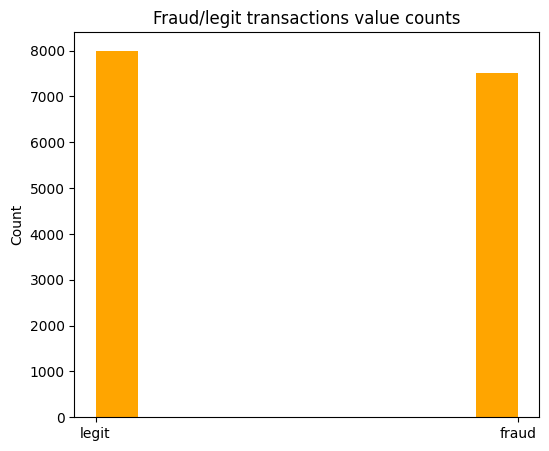

In [ ]:
# Fraud/legit transactions value counts
fig, ax = plt.subplots(figsize=(6,5))
ax.hist(df.is_fraud, color='orange')
ax.set_title('Fraud/legit transactions value counts')
ax.set_xticks(ticks=[0,1], labels=['legit', 'fraud'])
ax.set_ylabel('Count')
plt.show()

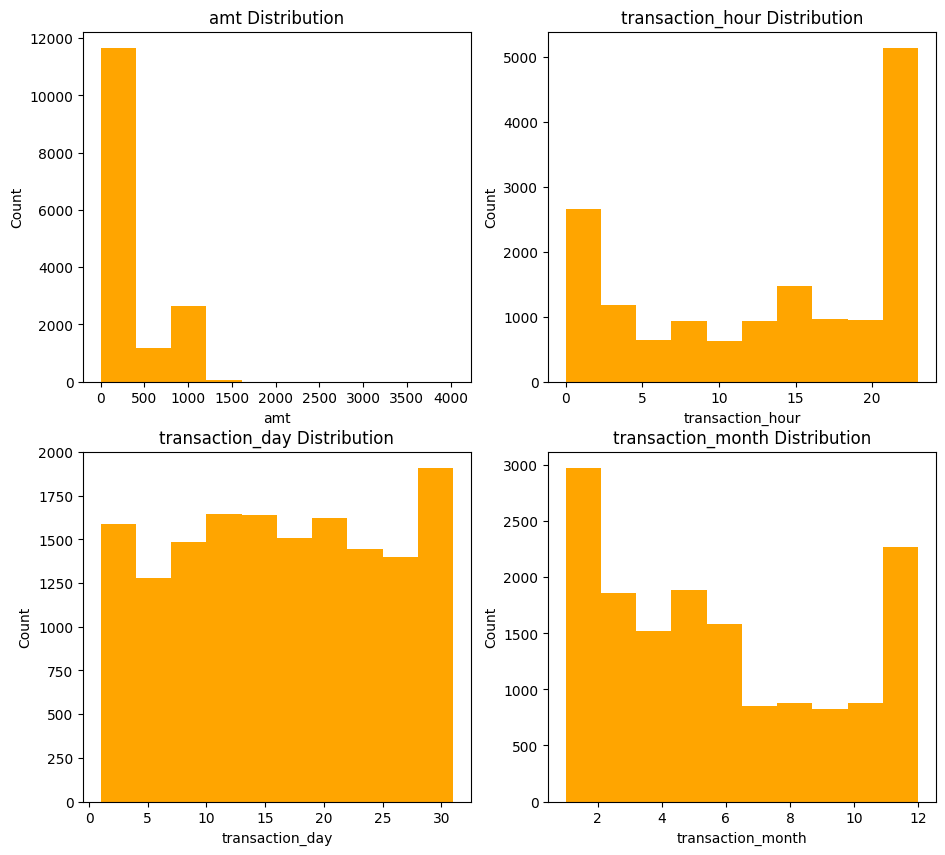

In [ ]:
# Numeric Colums distribution
numeric_cols = ['amt','transaction_hour', 'transaction_day','transaction_month']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11, 10)) #(width, height)
i = 0
for row in range(2):
  for col in range(2):
    ax[row,col].hist(x=df[numeric_cols[i]], color='orange')
    ax[row,col].set(title = f"{numeric_cols[i]} Distribution", xlabel=f"{numeric_cols[i]}", ylabel="Count")
    i += 1

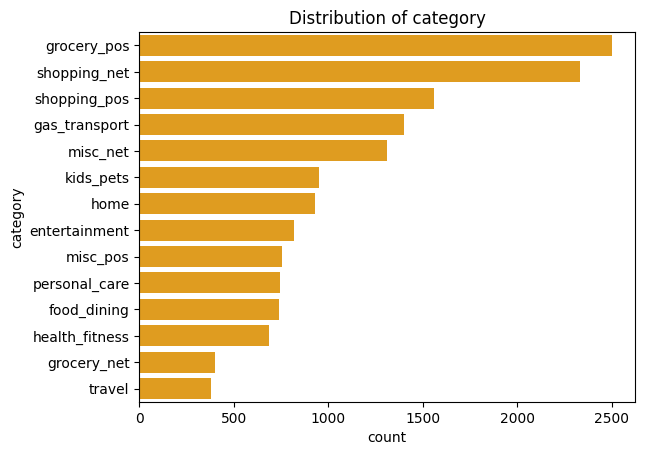

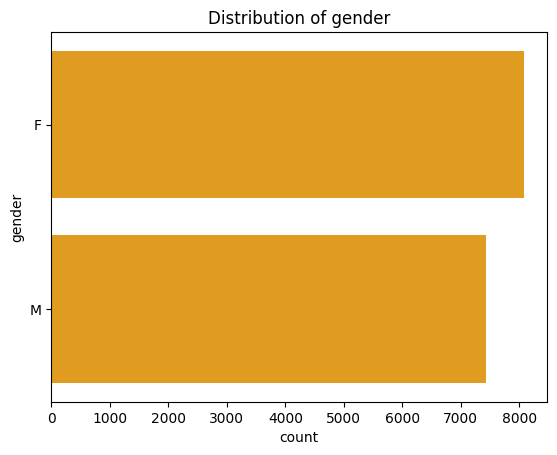

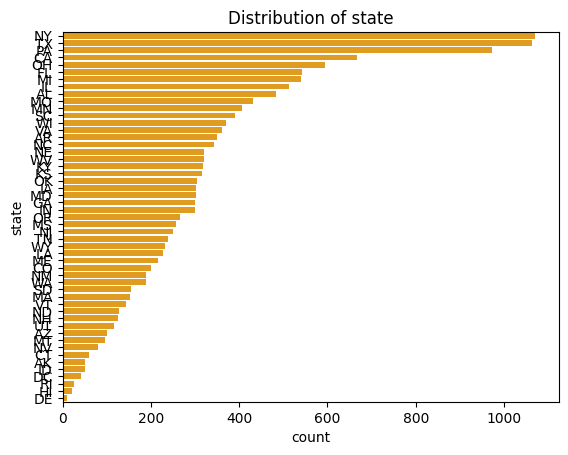

In [ ]:
for col in ['category', 'gender', 'state']:
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, color='orange')
    plt.title(f"Distribution of {col}")
    plt.show()

# **Bivariate Analysis**

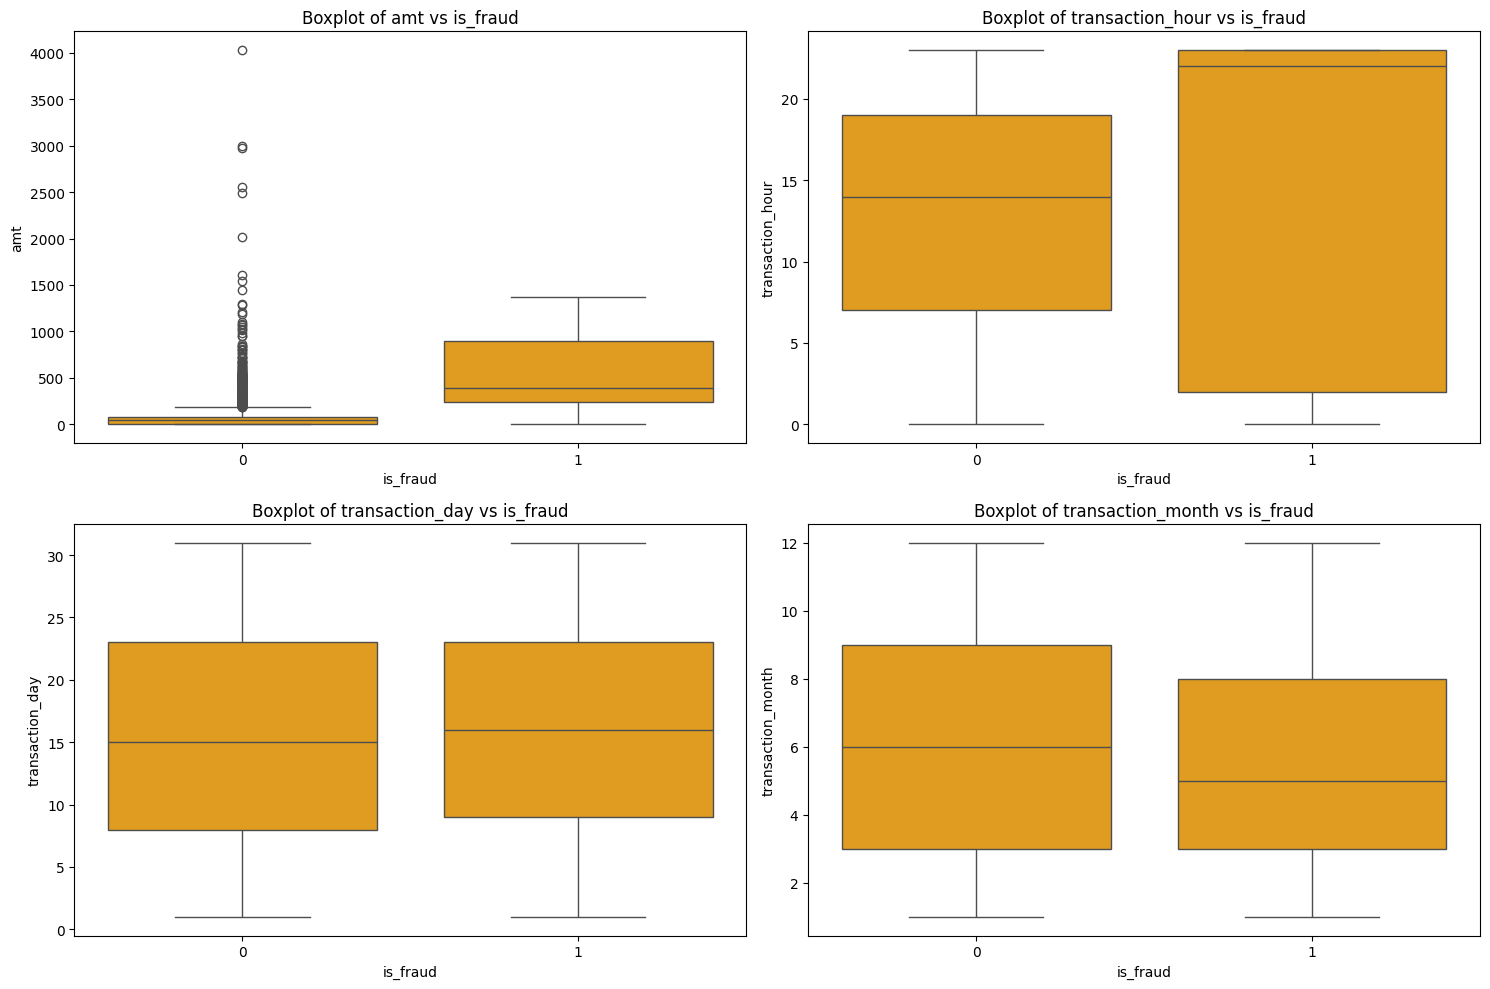

In [ ]:
# Create boxplots for numerical variables vs Target col (is_fraud)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='is_fraud', y=col, color='orange')
    plt.title(f'Boxplot of {col} vs is_fraud')
    plt.tight_layout()

plt.show()

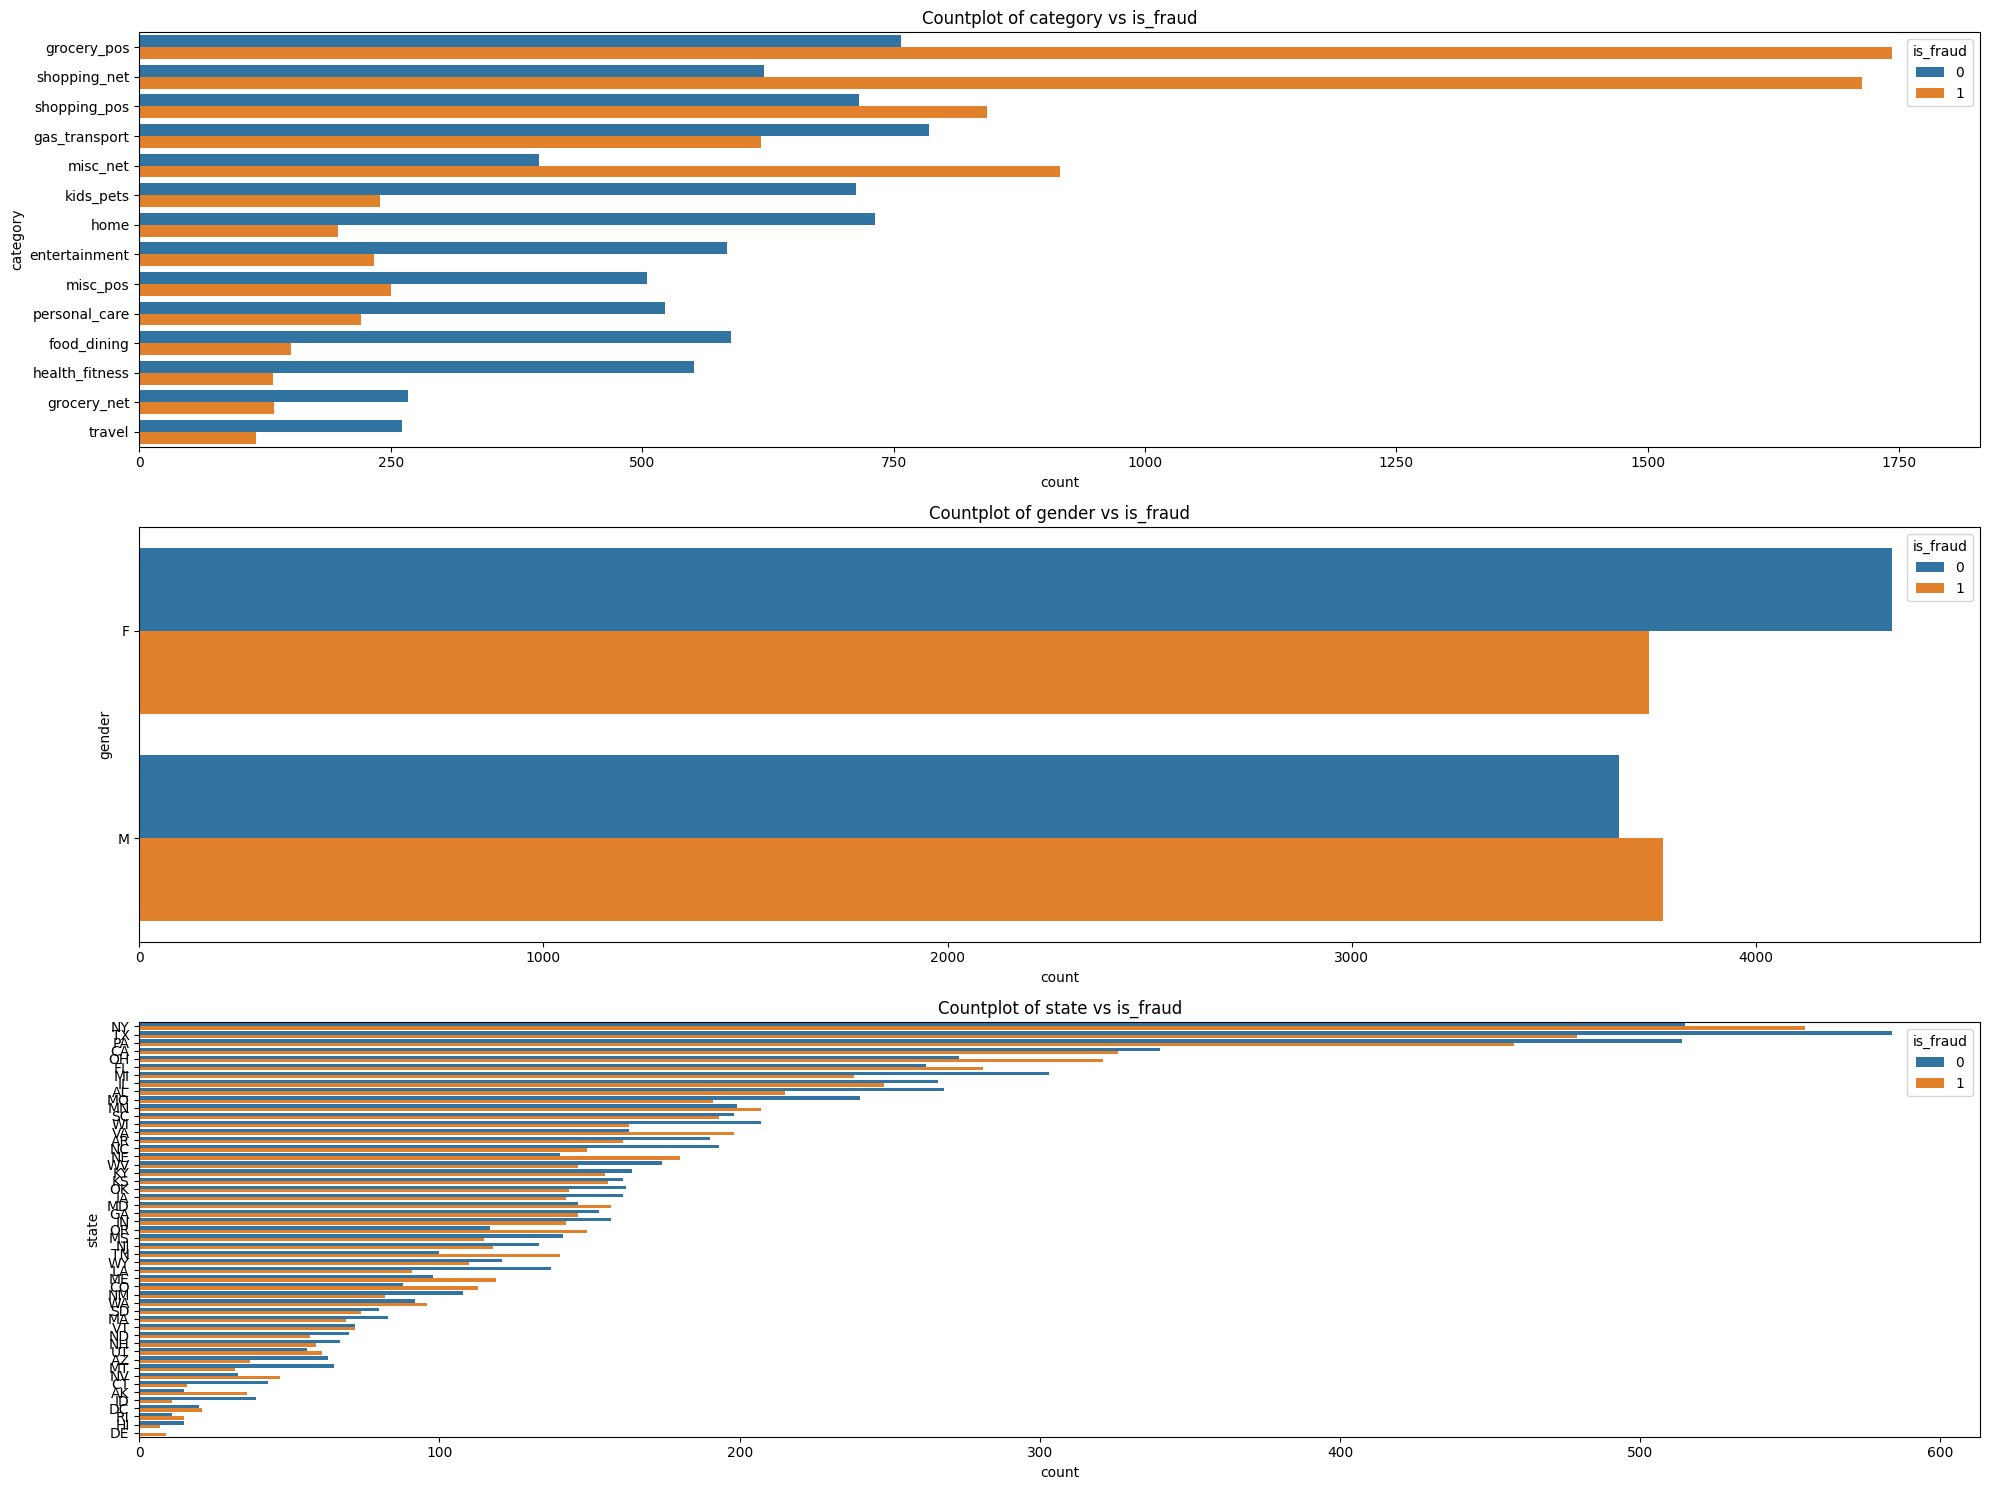

In [ ]:

# Create bar plots for categorical variables
plt.figure(figsize=(20, 15))
for i, col in enumerate(['category', 'gender', 'state'], 1):
    plt.subplot(3, 1, i)
    sns.countplot(data=df, y=col, hue='is_fraud', order=df[col].value_counts().index)
    plt.title(f'Countplot of {col} vs is_fraud')
    plt.tight_layout()

plt.show()

# **Multivariate Analysis**

In [ ]:
numeric_cols


['amt', 'transaction_hour', 'transaction_day', 'transaction_month']

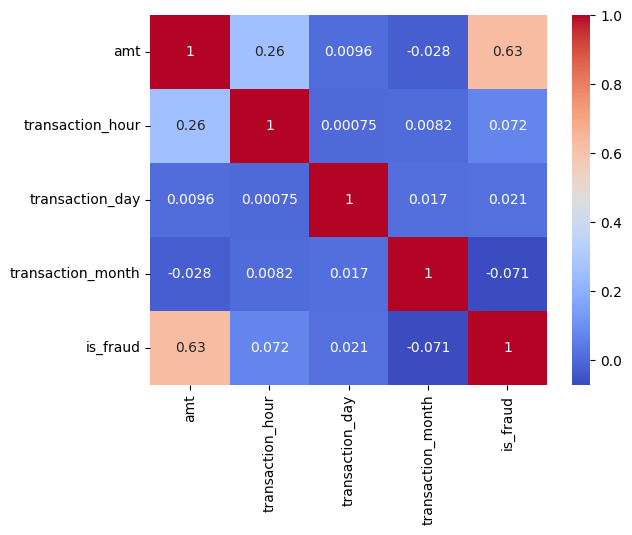

In [ ]:
sns.heatmap(df[['amt', 'transaction_hour', 'transaction_day', 'transaction_month', 'is_fraud']].corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15506 entries, 0 to 15505
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cc_num                   15506 non-null  int64  
 1   merchant                 15506 non-null  object 
 2   category                 15506 non-null  object 
 3   amt                      15506 non-null  float64
 4   gender                   15506 non-null  object 
 5   street                   15506 non-null  object 
 6   city                     15506 non-null  object 
 7   state                    15506 non-null  object 
 8   zip                      15506 non-null  int64  
 9   lat                      15506 non-null  float64
 10  long                     15506 non-null  float64
 11  city_pop                 15506 non-null  int64  
 12  job                      15506 non-null  object 
 13  unix_time                15506 non-null  int64  
 14  merch_lat             

In [ ]:
# Encode Categorical Columns with LabelEncoder
categorical_cols = ['merchant','category','gender','street','city','state','job']
le = LabelEncoder()
for col in categorical_cols:
  df[col] = le.fit_transform(df[col])


In [ ]:
df.head().T

,0,1,2,3,4
cc_num,4.897068e+18,3.805200e+13,4.170689e+15,3.725093e+14,2.222002e+15
merchant,2.530000e+02,9.900000e+01,4.710000e+02,2.630000e+02,1.370000e+02
category,5.000000e+00,2.000000e+00,6.000000e+00,0.000000e+00,9.000000e+00
amt,7.640000e+00,5.474000e+01,4.311000e+01,3.529000e+01,1.720000e+00
gender,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
street,5.430000e+02,3.620000e+02,8.230000e+02,2.610000e+02,2.170000e+02
city,6.570000e+02,1.540000e+02,2.380000e+02,2.910000e+02,5.290000e+02
state,9.000000e+00,4.300000e+01,3.600000e+01,2.200000e+01,1.400000e+01
zip,3.466800e+04,7.732700e+04,7.303400e+04,4.843800e+04,6.206700e+04
lat,2.830110e+01,3.033000e+01,3.566650e+01,4.291470e+01,3.893180e+01


In [ ]:
# shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)
# Split Data Into Features and Target(is_fraud)
X = df.drop('is_fraud', axis=1)
Y = df['is_fraud']


In [ ]:
# # Perform Standardization using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
X.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,job,unix_time,merch_lat,merch_long,transaction_year,transaction_month,transaction_day,transaction_day_of_week,transaction_hour,transaction_minute
0,-0.307684,-1.090866,1.355298,1.913190,-0.959543,0.082873,-0.952268,1.547330,-0.831560,-0.167423,...,-1.457006,1.196979,-0.356490,0.658672,1.543818,-0.824125,1.727832,-0.982876,-0.050245,1.354573
1,3.422292,0.534047,-0.703583,-0.014709,1.042162,1.689981,-0.634540,1.128059,1.033111,-0.962630,...,-0.592785,0.636620,-1.087596,-0.514381,1.543818,-1.405089,-1.464840,0.420181,1.029182,-1.246400
2,-0.310438,0.513735,1.097938,-0.585631,1.042162,0.729983,0.229524,-0.968293,1.306960,1.180398,...,-1.335586,-0.422316,1.108179,-1.871960,-0.647745,0.337803,0.929664,-0.515190,-1.249609,1.527971
3,-0.310274,-1.080710,-1.475663,-0.769983,1.042162,0.904205,0.969597,1.617208,1.264716,0.869731,...,0.114304,-0.203671,1.046927,-1.234478,-0.647745,0.628285,1.157712,-1.450562,1.149118,-0.206011
4,-0.306866,-1.243202,-0.188862,-0.564830,1.042162,-1.666456,0.981221,0.778667,-1.112178,0.463210,...,-0.235670,-0.501850,0.269531,0.928997,-0.647745,0.337803,-0.552648,-0.047505,0.789309,0.892178


In [ ]:
# split data into train/test set
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
x_train.shape, y_train.shape, x_test.shape,  y_test.shape



((12404, 22), (12404,), (3102, 22), (3102,))

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg.score(x_train, y_train)

0.8620606256046437

In [ ]:
log_reg.score(x_test, y_test)

0.8465506125080593

In [ ]:
# make predictions
y_preds = log_reg.predict(x_test)
y_preds_proba = log_reg.predict_proba(x_test)

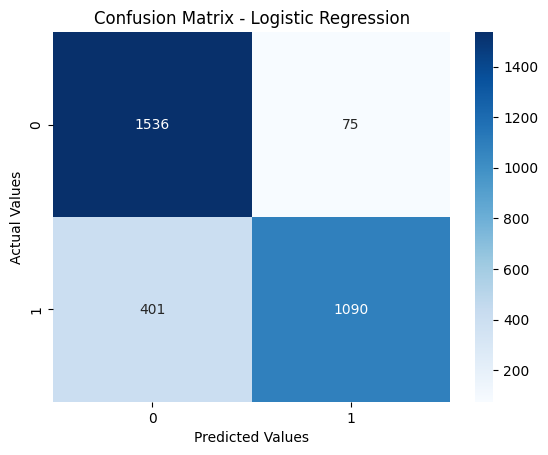

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix - Logistic Regression')
plt.show();

**True Negatives (1536):** The model correctly predicted 1530 instances as negative.

**False Positives (75):** The model incorrectly predicted 87 negative instances as positive.

**False Negatives (401):** The model incorrectly predicted 377 positive instances as negative.

**True Positives (1090):** The model correctly predicted 1108 instances as positive.

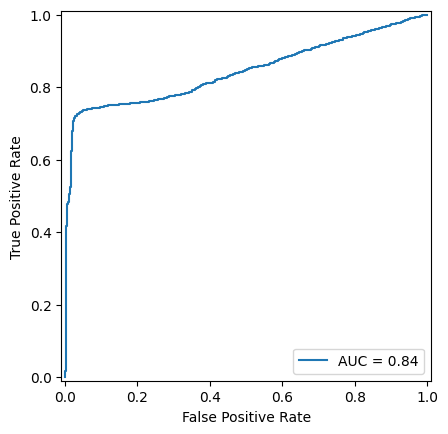

In [ ]:
# Area under the curve

auc_score = roc_auc_score(y_test, y_preds_proba[:,1])

# RocCurveDisplay
fpr, tpr, threshold = roc_curve(y_test, y_preds_proba[:,1])
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = auc_score).plot()

Closer the curve is to the top left corner, the more accurate the model is.

# Cross Validation

In [ ]:
# Cross Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(), X, Y, cv=5)
print(scores)
print(scores.mean())

[0.86460348 0.86036762 0.84521122 0.86294744 0.8606901 ]
0.8587639726874153


**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the model
log_reg = LogisticRegression(max_iter=1000)

# Set up the parameter grid for RandomizedSearchCV
param_dist = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'penalty': ['none', 'l1', 'l2', 'elasticnet'],  # note: some combinations may not work with certain solvers
    'C': [100, 10, 1.0, 0.1, 0.01]
}

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings sampled
    scoring='accuracy',  # or use any scoring metric relevant to your problem
    cv=5,       # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1   # Use all available cores
)

# Fit the random search on data (assuming you have X and y as your features and labels)
random_search.fit(x_train, y_train)

# Best parameters and model
print("Best parameters found:", random_search.best_params_)
print("Best score achieved:", random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Best parameters found: {'solver': 'sag', 'penalty': 'l2', 'C': 1.0}
Best score achieved: 0.8622221138718779


Hyperparamter Tuning didn't enhance the performance of Logistic Regression. On this dataset with Logistic Regression, the maximum achieved accuracy is **86%**

# **K-Nearest Neighbors**



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print(f"Train Score: {knn.score(x_train, y_train)}")
print(f"Test Score: {knn.score(x_test, y_test)}")


Train Score: 0.905272492744276
Test Score: 0.8249516441005803


**Cross Validation (KNN)**

In [ ]:
scores = cross_val_score(KNeighborsClassifier(), X, Y, cv=5)
print(scores)
print(scores.mean())

[0.81656995 0.82908739 0.8358594  0.82844244 0.83811674]
0.829615184137061


With KNN, overall accuracy is **82.9%**

# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(
    max_depth=10,            # Limit tree depth
    min_samples_split=5,     # Require more samples per split
    min_samples_leaf=4,      # Require more samples per leaf
    max_features='sqrt',     # Use a subset of features at each split
    n_estimators=100,        # Number of trees in the forest
    random_state=42
)
rfc.fit(x_train, y_train)
print(f"Train Score: {rfc.score(x_train, y_train)}")
print(f"Test Score: {rfc.score(x_test, y_test)}")

Train Score: 0.9688003869719445
Test Score: 0.9458413926499033


In [ ]:
# make predictions
y_preds = rfc.predict(x_test)
y_preds_proba = rfc.predict_proba(x_test)

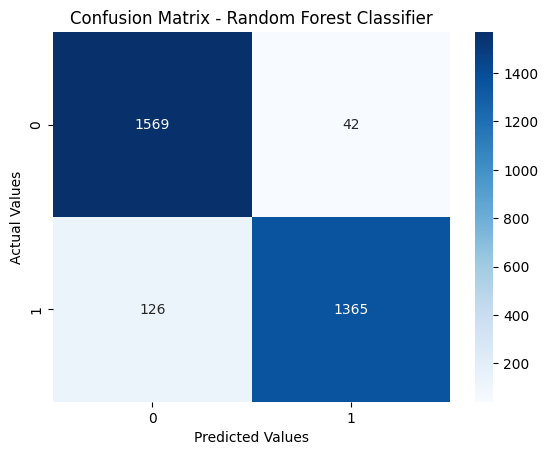

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_preds)
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show();

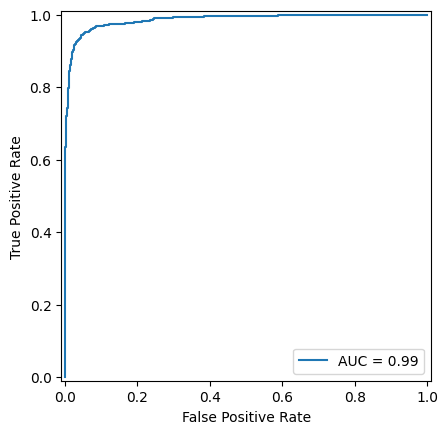

In [ ]:
# Area under the curve
auc_score = roc_auc_score(y_test, y_preds_proba[:,1])
# RocCurveDisplay
fpr, tpr, threshold = roc_curve(y_test, y_preds_proba[:,1])
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = auc_score).plot();

**Cross Validation (Random Forest Classifier)**

In [ ]:
rfc_1 = RandomForestClassifier(
    max_depth=10,            # Limit tree depth
    min_samples_split=5,     # Require more samples per split
    min_samples_leaf=4,      # Require more samples per leaf
    max_features='sqrt',     # Use a subset of features at each split
    n_estimators=100,        # Number of trees in the forest
    random_state=42
)

scores = cross_val_score(rfc_1, X, Y, cv=5)
print(scores)
print(scores.mean())

[0.94680851 0.94937117 0.95098355 0.95259594 0.95162851]
0.9502775357297235


With **RandomForestClassifier()** maximum accuracy is **95%**

# **Deep Learning : Fully Connected Neural Network**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=32)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7520 - loss: 0.5292 - val_accuracy: 0.8395 - val_loss: 0.3841
Epoch 2/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8622 - loss: 0.3430 - val_accuracy: 0.8472 - val_loss: 0.3331
Epoch 3/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8695 - loss: 0.3003 - val_accuracy: 0.8478 - val_loss: 0.3280
Epoch 4/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8687 - loss: 0.2944 - val_accuracy: 0.8536 - val_loss: 0.3128
Epoch 5/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8763 - loss: 0.2897 - val_accuracy: 0.8549 - val_loss: 0.3117
Epoch 6/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8824 - loss: 0.2699 - val_accuracy: 0.8611 - val_loss: 0.3069
Epoch 7/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8835 - loss: 0.2618 - val_accuracy: 0.8617 - val_loss: 0.2983
Epoch 8/20
388/388 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8902 - loss: 0.2505 - val_accuracy: 0.

In [ ]:
model.evaluate(x_test, y_test)

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9049 - loss: 0.2566


[0.24120956659317017, 0.9061895608901978]